<a href="https://colab.research.google.com/github/b4lbs/alura_ML_otimizacao_com_exploracao_aleatoria/blob/main/ML_otimizacao_com_exploracao_aleatoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
from sklearn.model_selection import RandomizedSearchCV, KFold, GridSearchCV, StratifiedShuffleSplit, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
import graphviz
import time
import pandas as pd
import numpy as np

uri = "https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv"
dados = pd.read_csv(uri).drop(columns = ['Unnamed: 0'], axis = 1)
dados_azar = dados.sort_values("vendido", ascending = True)
X_azar = dados_azar[["preco", "idade_do_modelo", "km_por_ano"]]
y_azar = dados_azar['vendido']
dados_azar.head()

,preco,vendido,idade_do_modelo,km_por_ano
4999,74023.29,0,12,24812.80412
5322,84843.49,0,13,23095.63834
5319,83100.27,0,19,36240.72746
5316,87932.13,0,16,32249.56426
5315,77937.01,0,15,28414.50704


# Busca Aleatória: RandomSearch


In [55]:
SEED = 42
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3,5],
    "min_samples_split" : [32, 64, 128],
    "min_samples_leaf" : [32, 64, 128],
    "criterion" : ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                           espaco_de_parametros,
                           n_iter = 16,
                           cv = KFold(n_splits = 5, shuffle = True),
                           random_state = SEED)

busca.fit(X_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021720,0.005232,0.003078,0.000773,128,128,5,entropy,"{'min_samples_split': 128, 'min_samples_leaf':...",0.7845,0.7695,0.7885,0.7930,0.7825,0.7836,0.007915,12
1,0.019925,0.002821,0.003363,0.000153,64,64,5,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7845,0.7795,0.7885,0.7905,0.7825,0.7851,0.003980,7
2,0.019881,0.003388,0.003455,0.000210,128,128,3,entropy,"{'min_samples_split': 128, 'min_samples_leaf':...",0.7845,0.7855,0.7885,0.7930,0.7825,0.7868,0.003655,1
3,0.017313,0.002372,0.002125,0.000061,32,64,5,entropy,"{'min_samples_split': 32, 'min_samples_leaf': ...",0.7815,0.7795,0.7885,0.7905,0.7825,0.7845,0.004243,10
4,0.012770,0.000022,0.002010,0.000058,64,128,5,gini,"{'min_samples_split': 64, 'min_samples_leaf': ...",0.7845,0.7695,0.7885,0.7930,0.7825,0.7836,0.007915,12


In [56]:
scores = cross_val_score(busca, X_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
scores

array([0.7915, 0.7835, 0.7925, 0.7825, 0.783 ])

In [57]:
def imprime_score(scores):
  media = scores.mean() * 100
  desvio = scores.std() * 100
  print(f'Acurracy médio: {media:.2f}')
  print(f'Intervalo [{media - 2 * desvio:.2f} - {media + 2 * desvio:.2f}]')

imprime_score(scores)

Acurracy médio: 78.66
Intervalo [77.77 - 79.55]


In [58]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=128,
                       min_samples_split=128)

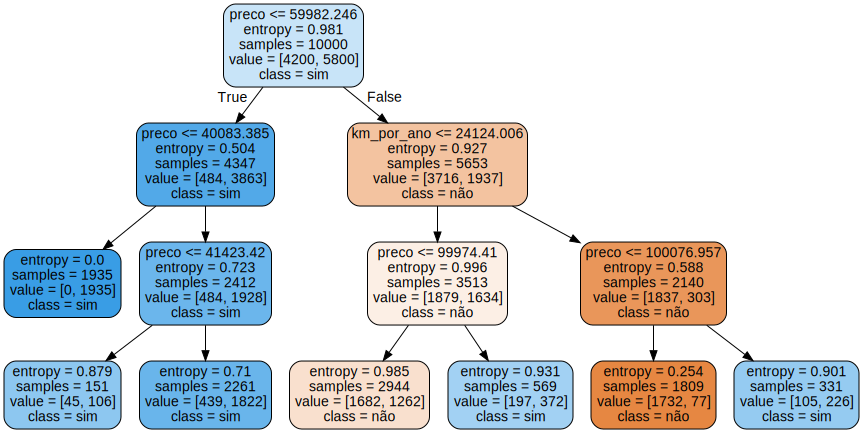

In [59]:
features = X_azar.columns
dot_data = export_graphviz(melhor, out_file=None, filled=True, rounded=True,
                          class_names=["não","sim"],
                          feature_names=features)
graph = graphviz.Source(dot_data)
graph

# Customizando o espaço de hiper parâmetros


In [60]:
from scipy.stats import randint
SEED = 42
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32, 128),
    "min_samples_leaf" : randint(32, 128),
    "criterion" : ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                           espaco_de_parametros,
                           n_iter = 16,
                           cv = KFold(n_splits = 5, shuffle = True),
                           random_state = SEED)

busca.fit(X_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016767,0.000395,0.002271,0.000096,gini,15,124,46,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7795,0.7705,0.7795,0.7865,0.7845,0.7801,0.005535,6
1,0.020627,0.001050,0.002156,0.000096,gini,20,52,114,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7690,0.7635,0.7650,0.7765,0.7755,0.7699,0.005305,15
2,0.016972,0.000348,0.002071,0.000100,gini,10,106,119,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.7745,0.7735,0.7835,0.7865,0.7830,0.7802,0.005212,5
3,0.021108,0.002123,0.002250,0.000143,gini,15,55,34,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7710,0.7600,0.7575,0.7785,0.7740,0.7682,0.008115,16
4,0.029044,0.002277,0.002273,0.000073,entropy,20,33,119,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.7680,0.7670,0.7700,0.7785,0.7810,0.7729,0.005731,13


In [61]:
scores = cross_val_score(busca, X_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
scores

array([0.7915, 0.7835, 0.7925, 0.7825, 0.783 ])

In [62]:
imprime_score(scores)

Acurracy médio: 78.66
Intervalo [77.77 - 79.55]


In [63]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=70, min_samples_split=49)

In [64]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending = False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print(f'{linha.mean_test_score:.3f} +-({linha.std_test_score*2:.3f}) {linha.params}')

0.787 +-(0.007) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 70, 'min_samples_split': 49}
0.787 +-(0.007) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 91, 'min_samples_split': 45}
0.785 +-(0.006) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 40, 'min_samples_split': 121}
0.784 +-(0.008) {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 53, 'min_samples_split': 120}
0.780 +-(0.010) {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 106, 'min_samples_split': 119}
0.780 +-(0.011) {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 124, 'min_samples_split': 46}
0.778 +-(0.019) {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 91, 'min_samples_split': 111}
0.778 +-(0.019) {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 93, 'min_samples_split': 78}
0.778 +-(0.013) {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 86, 'min_samples_split': 95}
0.777 +-(0.018) {'criterion': 'gini', 'max_dept

# Uma exploração mais a fundo de forma aleatória


In [65]:
#Usando n_iter = 64 ao invé de n_iter = 16
from scipy.stats import randint
SEED = 42
np.random.seed(SEED)

espaco_de_parametros = {
    "max_depth" : [3, 5, 10, 15, 20, 30, None],
    "min_samples_split" : randint(32, 128),
    "min_samples_leaf" : randint(32, 128),
    "criterion" : ["gini", "entropy"]
}

busca = RandomizedSearchCV(DecisionTreeClassifier(),
                           espaco_de_parametros,
                           n_iter = 64,
                           cv = KFold(n_splits = 5, shuffle = True),
                           random_state = SEED)

busca.fit(X_azar, y_azar)
resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017839,0.001280,0.002490,0.000048,gini,15,124,46,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7795,0.7705,0.7795,0.7865,0.7845,0.7801,0.005535,23
1,0.020535,0.000628,0.002798,0.000469,gini,20,52,114,"{'criterion': 'gini', 'max_depth': 20, 'min_sa...",0.7690,0.7635,0.7650,0.7765,0.7755,0.7699,0.005305,61
2,0.017162,0.000318,0.002496,0.000235,gini,10,106,119,"{'criterion': 'gini', 'max_depth': 10, 'min_sa...",0.7745,0.7735,0.7835,0.7865,0.7830,0.7802,0.005212,21
3,0.020307,0.000382,0.002692,0.000474,gini,15,55,34,"{'criterion': 'gini', 'max_depth': 15, 'min_sa...",0.7710,0.7600,0.7575,0.7785,0.7740,0.7682,0.008115,64
4,0.028389,0.001215,0.002732,0.000313,entropy,20,33,119,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.7680,0.7670,0.7700,0.7785,0.7810,0.7729,0.005731,55


In [66]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending = False)
for indice, linha in resultados_ordenados_pela_media.iterrows():
  print(f'{linha.mean_test_score:.3f} +-({linha.std_test_score*2:.3f}) {linha.params}')

0.787 +-(0.007) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 79, 'min_samples_split': 54}
0.787 +-(0.007) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 119, 'min_samples_split': 32}
0.787 +-(0.007) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 50, 'min_samples_split': 33}
0.787 +-(0.007) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 103, 'min_samples_split': 43}
0.787 +-(0.007) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 33, 'min_samples_split': 33}
0.787 +-(0.007) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 91, 'min_samples_split': 45}
0.787 +-(0.007) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 70, 'min_samples_split': 49}
0.787 +-(0.007) {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 83, 'min_samples_split': 93}
0.787 +-(0.007) {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 93, 'min_samples_split': 68}
0.787 +-(0.007) {'criterion': 'entropy', 'max_depth': 3, 'min_

In [67]:
scores = cross_val_score(busca, X_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
scores

array([0.783 , 0.796 , 0.7865, 0.778 , 0.7905])

In [68]:
imprime_score(scores)

Acurracy médio: 78.68
Intervalo [77.45 - 79.91]


In [69]:
melhor = busca.best_estimator_
melhor

DecisionTreeClassifier(max_depth=3, min_samples_leaf=70, min_samples_split=49)

# Comparando GridSearchCV com RandomizedSearch (apenas uma comparação)

In [70]:
# Testando GridSearchCV
SEED=42
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : [20, 100],
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

tic = time.time()
busca = GridSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(X_azar, y_azar)
tac = time.time()

tempo_que_passou = tac - tic
print(f"Tempo: {tempo_que_passou:.2f} segundos.")


resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo: 238.20 segundos.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.076543,0.002950,0.005714,0.000094,True,gini,3,32,32,20,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7775,0.7700,0.7730,0.7775,0.7580,0.7712,0.007187,111
1,0.370713,0.007299,0.019268,0.000549,True,gini,3,32,32,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7725,0.7745,0.7725,0.7800,0.7725,0.7744,0.002905,78
2,0.076683,0.003618,0.006023,0.000408,True,gini,3,32,64,20,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7675,0.7645,0.7725,0.7795,0.7680,0.7704,0.005219,116
3,0.385276,0.033628,0.020686,0.003792,True,gini,3,32,64,100,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7705,0.7740,0.7715,0.7770,0.7715,0.7729,0.002354,98
4,0.119834,0.002725,0.008505,0.000596,True,gini,3,32,128,20,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7350,0.7650,0.7730,0.7705,0.7715,0.7630,0.014258,139


In [71]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending = False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print(f'{linha.mean_test_score:.3f} +-({linha.std_test_score*2:.3f}) {linha.params}')

0.781 +-(0.006) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 64, 'n_estimators': 20}
0.780 +-(0.013) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 32, 'min_samples_split': 128, 'n_estimators': 20}
0.780 +-(0.015) {'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 20}
0.779 +-(0.015) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 64, 'n_estimators': 20}
0.779 +-(0.011) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 64, 'min_samples_split': 128, 'n_estimators': 20}


In [ ]:
#RUNTIME ALTO, NÃO É POSSÍVEL RODAR NO COLAB
tic = time.time()
scores = cross_val_score(busca, X_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
tac = time.time()
tempo_que_passou = tac - tic
print(f"Tempo: {tempo_que_passou:.2f} segundos.")

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

In [72]:
# Testando RandomizedSearchCV
SEED=42
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : [20, 100],
    "max_depth" : [3, 5],
    "min_samples_split": [32, 64, 128],
    "min_samples_leaf": [32, 64, 128],
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 20,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(X_azar, y_azar)
tac = time.time()

tempo_que_passou = tac - tic
print(f"Tempo: {tempo_que_passou:.2f} segundos.")


resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo: 33.85 segundos.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.631837,0.133631,0.023966,0.005975,100,64,64,3,entropy,False,"{'n_estimators': 100, 'min_samples_split': 64,...",0.7845,0.7710,0.7695,0.7615,0.7825,0.7738,0.008577,17
1,0.462918,0.012443,0.022576,0.001180,100,32,32,5,gini,True,"{'n_estimators': 100, 'min_samples_split': 32,...",0.7845,0.7725,0.7695,0.7695,0.7815,0.7755,0.006293,9
2,0.083615,0.002123,0.006242,0.000725,20,128,64,3,gini,False,"{'n_estimators': 20, 'min_samples_split': 128,...",0.7670,0.7640,0.7700,0.7690,0.7835,0.7707,0.006720,19
3,0.548708,0.005069,0.022199,0.000399,100,32,64,5,gini,False,"{'n_estimators': 100, 'min_samples_split': 32,...",0.7845,0.7720,0.7685,0.7705,0.7835,0.7758,0.006794,7
4,0.110832,0.004824,0.006375,0.000089,20,64,32,5,entropy,True,"{'n_estimators': 20, 'min_samples_split': 64, ...",0.7870,0.7705,0.7725,0.7685,0.7840,0.7765,0.007517,6


In [73]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending = False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print(f'{linha.mean_test_score:.3f} +-({linha.std_test_score*2:.3f}) {linha.params}')

0.781 +-(0.015) {'n_estimators': 20, 'min_samples_split': 128, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': True}
0.779 +-(0.016) {'n_estimators': 20, 'min_samples_split': 128, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.778 +-(0.015) {'n_estimators': 20, 'min_samples_split': 128, 'min_samples_leaf': 32, 'max_depth': 5, 'criterion': 'gini', 'bootstrap': False}
0.778 +-(0.016) {'n_estimators': 20, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}
0.777 +-(0.011) {'n_estimators': 100, 'min_samples_split': 32, 'min_samples_leaf': 64, 'max_depth': 5, 'criterion': 'entropy', 'bootstrap': False}


In [74]:
tic = time.time()
scores = cross_val_score(busca, X_azar, y_azar, cv = KFold(n_splits = 5, shuffle = True))
tac = time.time()
tempo_que_passou = tac - tic
print(f"Tempo: {tempo_que_passou:.2f} segundos.")

imprime_score(scores)
melhor = busca.best_estimator_
print(melhor)

Tempo: 145.25 segundos.
Acurracy médio: 78.02
Intervalo [76.17 - 79.87]
RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=64,
                       min_samples_split=128, n_estimators=20)


In [75]:
# Testando mais possibilidades
SEED=42
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split": randint(32, 129),
    "min_samples_leaf": randint(32, 129),
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 80,
                    cv = KFold(n_splits = 5, shuffle=True))
busca.fit(X_azar, y_azar)
tac = time.time()

tempo_que_passou = tac - tic
print(f"Tempo: {tempo_que_passou:.2f} segundos.")


resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo: 114.61 segundos.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.287825,0.007847,0.013800,0.000202,True,entropy,3,46,103,70,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.7880,0.7700,0.7620,0.7870,0.7675,0.7749,0.010613,37
1,0.345382,0.007022,0.017460,0.000313,True,gini,4,114,118,84,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7865,0.7685,0.7610,0.7855,0.7720,0.7747,0.009892,45
2,0.127471,0.005610,0.007506,0.000067,True,entropy,3,55,34,31,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.7205,0.7700,0.7615,0.7705,0.7720,0.7589,0.019548,80
3,0.487953,0.080214,0.020563,0.002621,True,entropy,4,69,33,73,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.7850,0.7705,0.7620,0.7850,0.7720,0.7749,0.008924,37
4,0.169256,0.032808,0.009131,0.002169,False,gini,3,107,89,31,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7880,0.7625,0.7605,0.7730,0.7715,0.7711,0.009754,66


In [76]:
resultados_ordenados_pela_media = resultados.sort_values("mean_test_score", ascending = False)
for indice, linha in resultados_ordenados_pela_media[:5].iterrows():
  print(f'{linha.mean_test_score:.3f} +-({linha.std_test_score*2:.3f}) {linha.params}')

0.779 +-(0.018) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 46, 'min_samples_split': 74, 'n_estimators': 38}
0.779 +-(0.023) {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 83, 'min_samples_split': 127, 'n_estimators': 13}
0.779 +-(0.023) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 91, 'min_samples_split': 102, 'n_estimators': 53}
0.778 +-(0.025) {'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 51, 'min_samples_split': 90, 'n_estimators': 45}
0.778 +-(0.020) {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 33, 'min_samples_split': 34, 'n_estimators': 65}


# Se não for possível usar cross validation


In [84]:
# 0.6 treino
# 0.2 teste
# 0.2 validacao

SEED = 42
np.random.seed(SEED)

X_treino_teste, X_validacao, y_treino_teste, y_validacao = train_test_split(X_azar, y_azar, test_size = 0.2, shuffle = True, stratify = y_azar)

print(X_treino_teste.shape)
print(X_validacao.shape)
print(y_treino_teste.shape)
print(y_validacao.shape)

(8000, 3)
(2000, 3)
(8000,)
(2000,)


In [85]:
SEED=42
np.random.seed(SEED)

espaco_de_parametros = {
    "n_estimators" : randint(10, 101),
    "max_depth" : randint(3, 6),
    "min_samples_split": randint(32, 129),
    "min_samples_leaf": randint(32, 129),
    "bootstrap" : [True, False],
    "criterion": ["gini", "entropy"]

}

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25)

tic = time.time()
busca = RandomizedSearchCV(RandomForestClassifier(),
                    espaco_de_parametros,
                    n_iter = 5,
                    cv = split)
busca.fit(X_treino_teste, y_treino_teste)
tac = time.time()

tempo_que_passou = tac - tic
print(f"Tempo: {tempo_que_passou:.2f} segundos.")


resultados = pd.DataFrame(busca.cv_results_)
resultados.head()

Tempo: 1.48 segundos.


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
0,0.254340,0.0,0.014740,0.0,True,entropy,3,46,103,70,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.7810,0.7810,0.0,2
1,0.288994,0.0,0.023275,0.0,True,gini,4,114,118,84,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.7780,0.7780,0.0,4
2,0.113829,0.0,0.007734,0.0,True,entropy,3,55,34,31,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.7805,0.7805,0.0,3
3,0.291109,0.0,0.015456,0.0,True,entropy,4,69,33,73,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.7820,0.7820,0.0,1
4,0.102503,0.0,0.007626,0.0,False,gini,3,107,89,31,"{'bootstrap': False, 'criterion': 'gini', 'max...",0.7490,0.7490,0.0,5


In [87]:
tic = time.time()
scores = cross_val_score(busca, X_validacao, y_validacao, cv = split)
tac = time.time()
tempo_que_passou = tac - tic
print(f"Tempo: {tempo_que_passou:.2f} segundos.")
scores

Tempo: 1.19 segundos.


array([0.762])

Bibliotecas do python que tentam realizar uma busca aleatória de hiper parâmetros de forma mais inteligente:

skopt: https://scikit-optimize.github.io/stable/

hyperopt: http://hyperopt.github.io/hyperopt/